# Assignment 1

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import collections
import functools
import operator
from networkx.algorithms.components import connected_components

# set the figure size
plt.rcParams["figure.figsize"] = [10, 6]

## Part 1 answers

### Binning real numbers

#### Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [2]:
mu = 2
sigma = 0.125
N = 5000
data = np.random.randn(N) * sigma + mu

#### Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

In [4]:
hist, bin_edges = np.histogram(data)

* The values of the histogram and the bin edges, they don't have the same length

#### Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

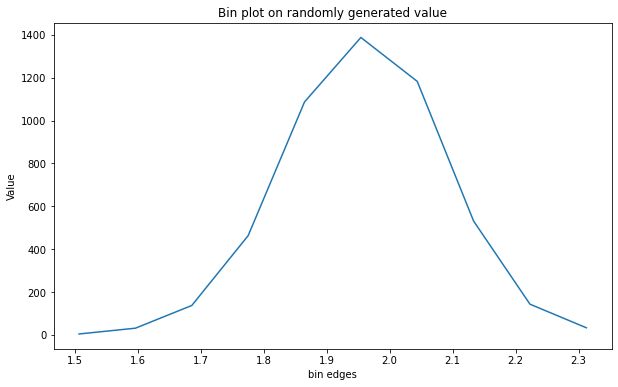

In [5]:
plt.plot(bin_edges[:-1], hist)
plt.title("Bin plot on randomly generated value")
plt.ylabel("Value")
plt.xlabel("bin edges")
plt.show()

* The bin-array actually contains values on both sides of the bins, so there will be one extra value compare to y coordinate, to deal with it, ignore the last value from bin-array

### Binning integers

#### But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by 𝜆=10. Find the maximum and minimum value of your 5000 random numbers. 

In [6]:
lam = 10 # lambda
intData = np.random.poisson(lam, N)
print(f"Min value of random numbers: {min(intData)}\nMax value of random numbers: {max(intData)}")

Min value of random numbers: 1
Max value of random numbers: 23


#### Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector 𝑣 that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how numpy.histogram deals with the smallest an largest value in particular; is it correct to set the first entry of 𝑣 to be equal to the smallest value you observe and the last entry of 𝑣 to be the highest value observed?). Use the vector by setting numpy.histogram's bin parameter as bin = 𝑣. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [7]:
vec = list(range(min(intData), max(intData) + 1))
hist, __ = np.histogram(intData, bins=vec)
sum(hist)

5000

The binning-vectors' first and last element defines the bountry of the histgram graph which is also the min and max value from the Poisson distribution.

#### Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution 

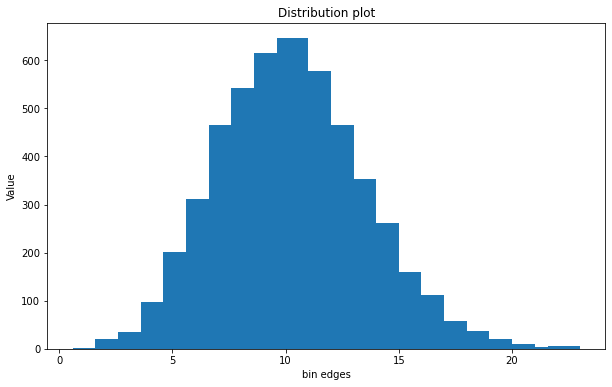

In [8]:
hist, bin_edges, __ = plt.hist(intData, bins=vec)
plt.bar(bin_edges[:-1], hist)
plt.title("Distribution plot")
plt.ylabel("Value")
plt.xlabel("bin edges")
plt.show()

The bar chat above contains the data generated from np.random.poisson function which shows a clear poisson distribution

### Binning and plotting degree distributions. 

#### Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that 𝑁=5000, but how do you find 𝑝? 

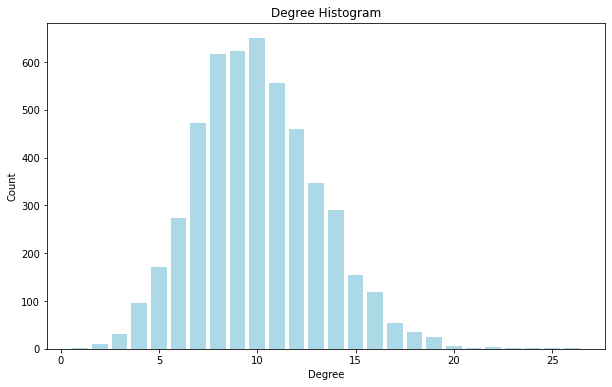

In [8]:
k = 10  # average degree
p = k / (N - 1)  # calculate the p

G = nx.erdos_renyi_graph(N, p)

degree_sequence = sorted([d for __, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)  # get the degree count
degree, count = zip(*degreeCount.items())  # take out the degree and count

fig, ax = plt.subplots()
plt.bar(degree, count, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

The histogram chart above shows the degree distribution of the ER network

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Part 2 Answers

### In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.

What is the expected number of links, 〈L〉?

In which regime is the network?

Calculate the probability pc so that the network is at the critical point

Given the linking probability $p = 10^{–3}$, calculate the number of nodes Ncr so that the network has only one component.

For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).


* Expected number of links, $〈L〉 = \frac{p*N*(N-1)}{2} = 4498.5$
* Supercritical Regime: according to the definition in a supercritical Regime where $〈k〉 > 1 \quad (p > \frac{1}{N})$
* $p = \frac{1}{N} = 0.000333$
* According to the definition: For $〈k〉 > ln{N}$ all components are absorbed by the giant component, resulting in a single connected network. again $p = \frac{k}{(N - 1)}$ so $0.001 * (N - 1) > ln{N}$ thus, $N = 9120$ 
* $k = p * (N - 1) = 10$, $d = 4$
* $pk = [165, 458, 653, 632, 499, 314, 156,  77,  32,  10,   4]$
    code for calculating pk 
    
    ```
    N = 3000
    p = 0.001
    G = nx.erdos_renyi_graph(N, p)
    data = [d for _, d in G.degree()]
    vec = list(range(min(data), max(data) + 1))
    hist, _ = np.histogram(data, bins=vec)
    ```

### Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

    Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)
    Choose a node at random from the GCC. (Hint: You may want to try random.choice.)
    Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)
    Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.


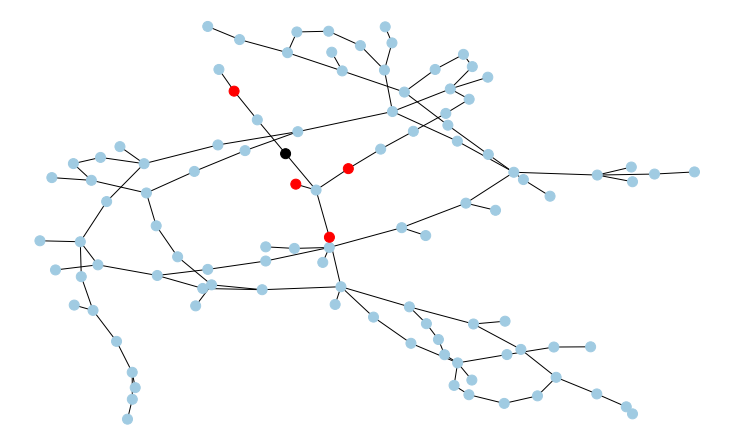

In [9]:
k = 1.5 
N = 200 
p = k / (N - 1)

G = nx.erdos_renyi_graph(N, p)

# get the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subG = G.subgraph(largest_cc)
# randomly choice a node
picked = random.choice(list(largest_cc))
d = nx.single_source_shortest_path_length(subG, picked)
dis2 = [node for node in d.keys() if d[node] == 2]
colorParm = []
for node in list(subG.nodes()):
    if node == picked:
        # color the start node black.
        colorParm.append("#000000")
    elif node in dis2:
        # color node 2 steps away red
        colorParm.append("#ff0000")
    else:
        # every other node is blue
        colorParm.append("#A0CBE2")

nx.drawing.nx_pylab.draw(subG, node_size=100, node_color=colorParm)

The random network plotted above contains 200 nodes with probability of 0.0075, a node is randomly chosen and marked with black color, nodes that two steps away from the chosen one are also marked with red color

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

## Part 3 answers

### Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


In [10]:
N = 500
k = 4
probabilities = [0.0, 0.1, 1.0]

graphs = [nx.watts_strogatz_graph(N, k, p) for p in probabilities]
# get the average shortest paths of all the graphs
average_shortes_paths = [nx.average_shortest_path_length(g) for g in graphs]

for p, avg in zip(probabilities, average_shortes_paths):
    print(f"The probaility p = {p} gives the average shortest path: {avg}")

The probaility p = 0.0 gives the average shortest path: 62.875751503006015
The probaility p = 0.1 gives the average shortest path: 7.364128256513026
The probaility p = 1.0 gives the average shortest path: 4.764024048096192


*When the p=1 the network is more dense and each node in average can reach every other node by 5 steps.*

### Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


In [11]:
N = 500
k = 4
probabilities = [0.0, 0.01, 0.03, 0.05, 0.1, 0.2]
number_of_graphs = 50

graphs = [nx.watts_strogatz_graph(N, k, p) for p in probabilities for __ in range(number_of_graphs)]

average_shortes_paths = [nx.average_shortest_path_length(g) for g in graphs]

average_of_average_shortes_paths = [
    sum(average_shortes_paths[i*number_of_graphs:(i+1)*number_of_graphs])/number_of_graphs for i in range(len(probabilities))
]

# calculate the standard deviations for all the probabilities
standard_deviations = [(p*(1-p)*N)**0.5 for p in probabilities]

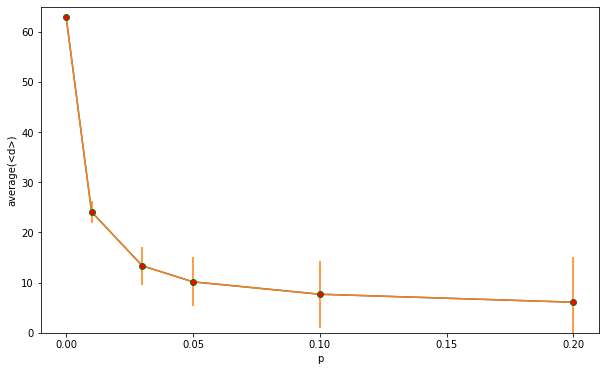

In [12]:
plt.plot(probabilities, average_of_average_shortes_paths)
plt.ylim(0, 65)  # as the average degree of p = 0.0 was 62.x lets just set the upper limit to 65
plt.xticks(np.arange(0, 1.05, 0.05))  # lets the x axes step in 0.05 intervals
plt.xlabel("p")
plt.ylabel("average(<d>)")
plt.errorbar(probabilities, average_of_average_shortes_paths, standard_deviations, marker="o", mfc="red", mec="green")
plt.show()

The figure above, shows the average of average degrees over rewiring probability for Watts-Strogatz graphs with errorbars showing the standard deviation.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

## Part 4 answers

### Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

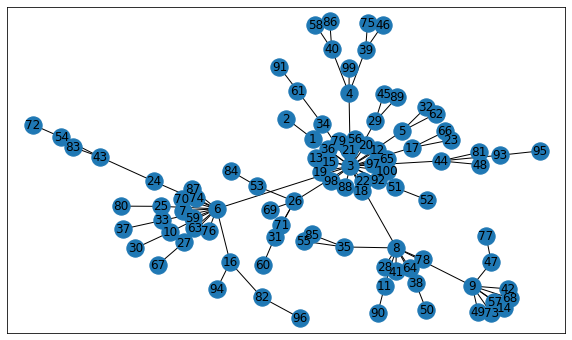

In [13]:
N = 100

def barabasi_albert(nodes):
    """barabasi_albert creates a barabasi-albert network of the nodes."""
    graph = nx.Graph()
    graph.add_edge(1, 2)

    for node in range(3, nodes+1):
        # flatten out the graph edges
        node_list = functools.reduce(operator.concat, graph.edges)
        # pick a random node
        random_node = random.choice(node_list)
        # create an edge with the random picked node
        graph.add_edge(node, random_node)

    return graph


g = barabasi_albert(N)
nx.draw_networkx(g)

The above figure shows the Barabasi-Albert graph model of 100 nodes.

### Now create a 5000 node network.

In [14]:
N = 5000
g = barabasi_albert(N)

#### What's the maximum and minimum degree?

In [15]:
key = lambda x: x[1]  # create lambda function which takes an list and returns the second element
minimum_node_degree = min(g.degree, key=key)
maximum_node_degree = max(g.degree, key=key)

print(f"Node: {minimum_node_degree[0]} with minimum degree: {minimum_node_degree[1]}")
print(f"Node: {maximum_node_degree[0]} with maximum degree: {maximum_node_degree[1]}")

Node: 20 with minimum degree: 1
Node: 2 with maximum degree: 238


#### Now, bin the degree distribution, for example using `numpy.histogram`.

In [16]:
hist, bin_edges = np.histogram([d for __, d in g.degree()], bins=maximum_node_degree[1])

#### Plot the distribution. Plot it with both linear and log-log axes.

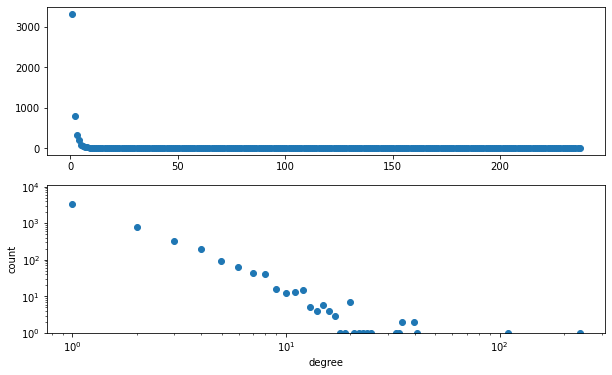

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(bin_edges[:-1], hist)
plt.ylabel("count")
plt.xlabel("degree")

ax2.scatter(bin_edges[:-1], hist)
plt.xscale("log")
plt.yscale("log")
# set the bottom to 1.. though this is confusing but it works! if it ain't broke don't fix it!
plt.ylim(1)
plt.show()

The above figure, shows the degree distribution of our Barabasi-Albert network in both linear and log-log axes.

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

## Part 5 answers

### How many out of those 1000 times is the friendship paradox true?

In [18]:
average_neighbor_degrees = nx.average_neighbor_degree(g)

count = 0
for __ in range(1000):
    node = random.choice(list(g.nodes))
    if g.degree[node] < average_neighbor_degrees[node]:
        count += 1

print(f"The friendship paradox is true in {count} of 1000 cases.")

The friendship paradox is true in 870 of 1000 cases.


### Compare to the ER network of same size and same $p$. What are the differences?

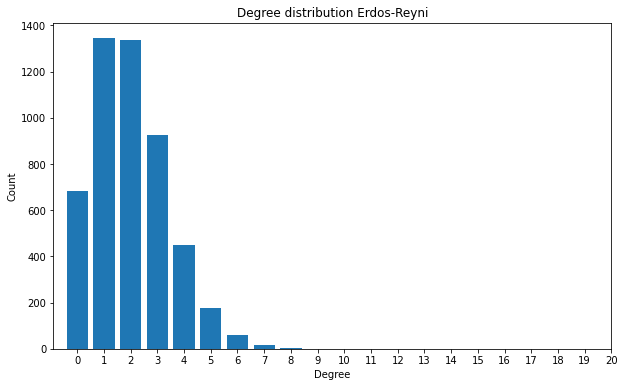

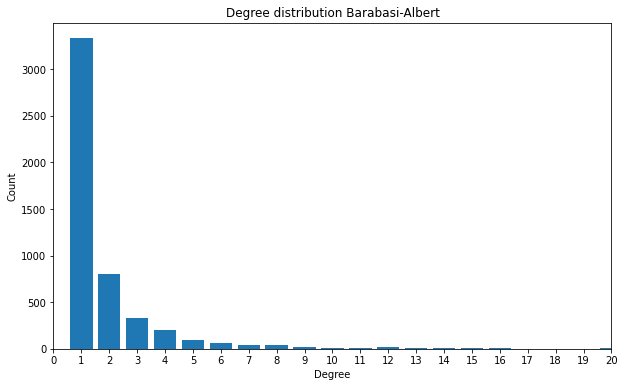

In [19]:
k = np.mean([d for __, d in g.degree])  # calculate the average degree

probability = k / (N-1)

erdos_renyi_graph = nx.erdos_renyi_graph(N, probability)

degree_sequence = sorted([d for __, d in erdos_renyi_graph.degree], reverse=True)
degree_count = collections.Counter(degree_sequence)
degree, count = zip(*degree_count.items())

plt.bar(degree, count)
plt.title("Degree distribution Erdos-Reyni")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(np.arange(0, 21, 1))
plt.show()


degree_sequence = sorted([d for __, d in g.degree], reverse=True)
degree_count = collections.Counter(degree_sequence)
degree, count = zip(*degree_count.items())

plt.bar(degree, count)
plt.title("Degree distribution Barabasi-Albert")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 20)
plt.xticks(np.arange(0, 21, 1))
plt.show()

In [20]:
max_ba = max(g.degree, key=key)
max_er = max(erdos_renyi_graph.degree, key=key)
print(f"The max degree of BA: {max_ba[1]}\nThe max degree of ER: {max_er[1]}")



The max degree of BA: 238
The max degree of ER: 9


In [21]:
# find all connected components of the Barabasi-Albert and Erdos-Reyni network 
# and return the how many of them their exist in the graph.
ba_components = len([len(c) for c in nx.connected_components(g)])
er_components = len([len(c) for c in nx.connected_components(erdos_renyi_graph)])

print(f"Number of components of BA: {ba_components}\nNumber of components of ER: {er_components}")

Number of components of BA: 1
Number of components of ER: 810


Barabasi-Albert (BA) network will all nodes always have a link whereas the Erdos-Reyni (ER) network does not have the same property.

The Barabasi-Albert network follows the power-law distribution while the Erdos-Reyni network follows a binomial distribution.

The max degree of the BA is high compared to the ER which matches the preferential attachment property of BA, which leads to clustering.

In the BA network the number of components will always be one while the ER network will have multiple components.